<a href="https://colab.research.google.com/github/Gabo-always-learning/Base-de-Datos/blob/main/T02-PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tarea 2</h1>

**Fecha de entrega:** Martes 30 de Septiembre, por Teams


![Pipeline del Machine Learning](https://drive.google.com/uc?id=1S9KVyZbkiciIEeC7cLi-epa62gfFM0pi)



# Ejercicio 1: Distorsión de las distancias con PCA

1. Genera un dataset sintético de 1000 puntos en 300 dimensiones. Puedes usar las funciones [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html), ...
2. Calcula la matriz de distancias euclidianas entre todos los pares de puntos. Puedes usar la función [`pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)
3. Aplica PCA al dataset y proyecta a 2D.
4. Calcula la matriz de distancias euclidianas en el espacio 2D con la misma función.
5. Grafica con matplotlib:
 * Un `scatterplot` de la distancia original (eje X) vs. la distancia proyectada con PCA (eje Y). Deberías ver que todos los puntos están debajo de la línea $y=x$, esto da evidencia de la propiedad
  $$\text{dist_proy} \leq \text{dist_original}$$
 * Un histograma del ratio $\displaystyle \frac{\text{dist_proy}}{\text{dist_original}}$. Verás que este ratio $r$ siempre satisface $r\leq 1$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [6]:
X, _ = make_blobs(n_samples=1000, n_features=300, centers=5, random_state=42)

dist_original = pairwise_distances(X, metric="euclidean")

print(dist_original)

[[  0.         154.20715922 155.70106489 ... 141.32606586 141.45174472
  154.84392362]
 [154.20715922   0.          25.29805381 ... 149.94619549 148.79577445
   26.30698487]
 [155.70106489  25.29805381   0.         ... 150.15887668 148.9629415
   25.63985217]
 ...
 [141.32606586 149.94619549 150.15887668 ...   0.          25.16119893
  148.31962756]
 [141.45174472 148.79577445 148.9629415  ...  25.16119893   0.
  147.32290447]
 [154.84392362  26.30698487  25.63985217 ... 148.31962756 147.32290447
    0.        ]]


In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

dist_proj = pairwise_distances(X_pca, metric="euclidean")

print(dist_proj)

[[  0.         128.31922528 129.31345065 ...  66.2882489   67.99710897
  127.33321798]
 [128.31922528   0.           1.07281635 ... 121.51617623 121.6919155
    1.01024109]
 [129.31345065   1.07281635   0.         ... 122.16815802 122.33192149
    1.98846047]
 ...
 [ 66.2882489  121.51617623 122.16815802 ...   0.           1.71322256
  120.55629173]
 [ 67.99710897 121.6919155  122.33192149 ...   1.71322256   0.
  120.73655686]
 [127.33321798   1.01024109   1.98846047 ... 120.55629173 120.73655686
    0.        ]]


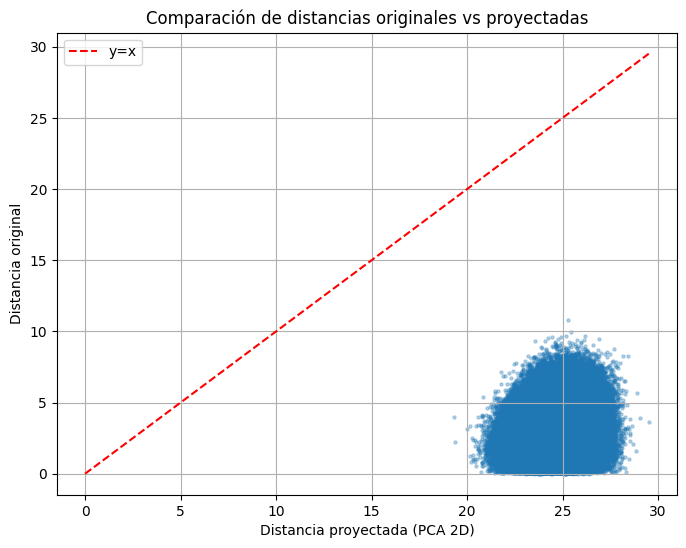

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(d_orig, d_proj, alpha=0.3, s=5)
plt.plot([0, d_orig.max()], [0, d_orig.max()], color="red", linestyle="--", label="y=x")
plt.ylabel("Distancia original")
plt.xlabel("Distancia proyectada (PCA 2D)")
plt.title("Comparación de distancias originales vs proyectadas")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
triu_indices = np.triu_indices_from(dist_original, k=1)
d_orig = dist_original[triu_indices]
d_proj = dist_proj[triu_indices]

ratio = d_proj / d_orig

print(ratio)


[0.09983088 0.07162343 0.17409055 ... 0.06514899 0.04636207 0.07582549]


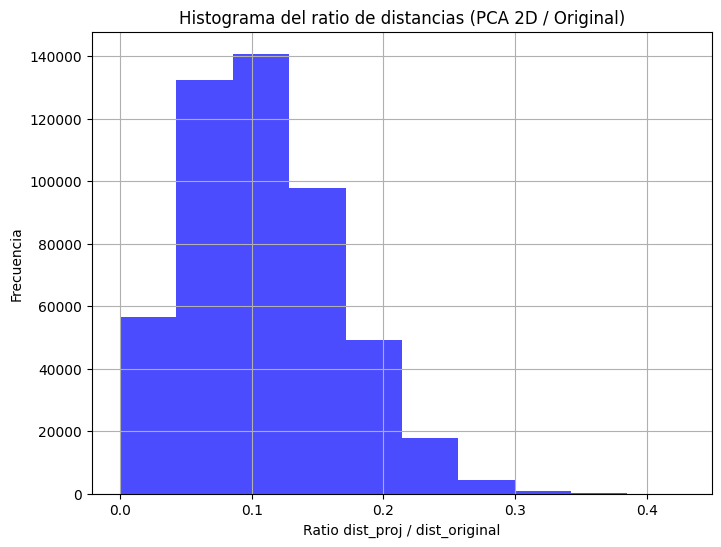

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(ratio, color="blue", alpha=0.7)
plt.xlabel("Ratio dist_proj / dist_original")
plt.ylabel("Frecuencia")
plt.title("Histograma del ratio de distancias (PCA 2D / Original)")
plt.grid(True)
plt.show()

# Ejercicio 2: PCA en una superficie cuadrática

* Samplea 500 puntos sobre la superficie de un toro o un paraboloide hiperbólico en $\mathbb{R}^3$.
* Agrega ruido normal a los puntos en la coordenada $z$.
* Grafica los puntos en $\mathbb{R}^3$, puedes usar la función `scatter_plot_3d_plotly` de la notebook de [PCA](https://github.com/gmauricio-toledo/tda-gdl/blob/main/06-PCA.ipynb).
* Haz PCA 2d a los puntos y graficalos.
* Compara ambas gráficas y observa qué tan adecuado fué usar PCA en este caso.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def sample_torus(n_points=500, R=2, r=1):
    theta = np.random.uniform(0, 2*np.pi, n_points)
    phi = np.random.uniform(0, 2*np.pi, n_points)
    x = (R + r*np.cos(theta)) * np.cos(phi)
    y = (R + r*np.cos(theta)) * np.sin(phi)
    z = r * np.sin(theta)
    return np.vstack((x, y, z)).T

In [19]:
X = sample_torus(500, R=2, r=1)
X_noisy = X.copy()
X_noisy[:, 2] += np.random.normal(0, 0.1, X_noisy.shape[0])

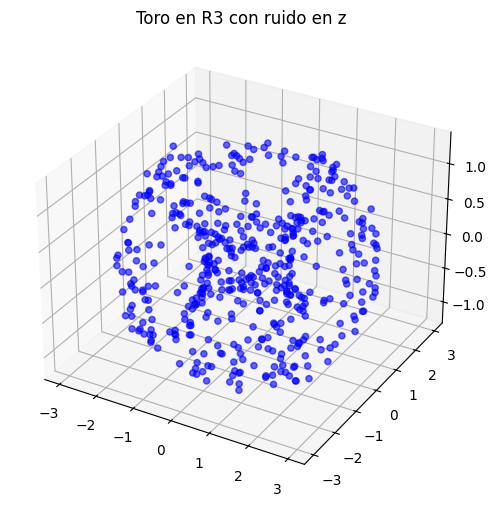

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_noisy[:, 0], X_noisy[:, 1], X_noisy[:, 2],
           c='b', alpha=0.6, s=20)
ax.set_title("Toro en R3 con ruido en z")
plt.show()

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_noisy)


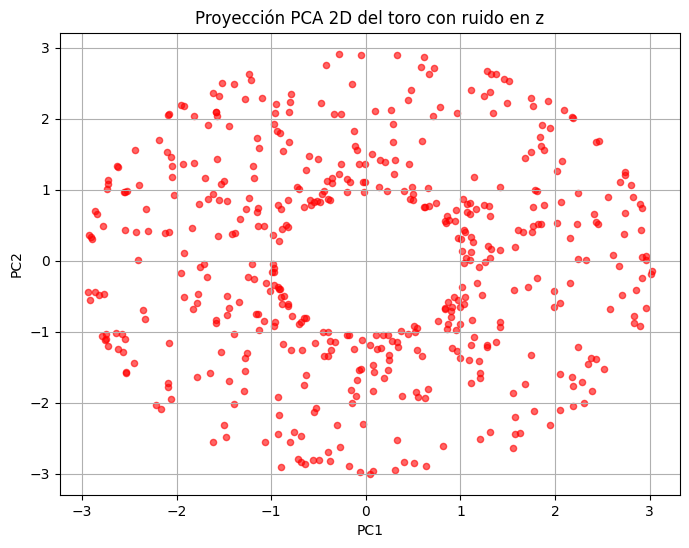

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c='r', alpha=0.6, s=20)
plt.title("Proyección PCA 2D del toro con ruido en z")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Ejercicio 3

En esta práctica, trabajaremos con un conjunto de datos que registra actividades humanas mediante sensores de un dispositivo móvil. El estudio original se realizó con 30 voluntarios de entre 19 y 48 años, quienes llevaron un smartphone en la cintura mientras realizaban seis actividades cotidianas: caminar, subir escaleras, bajar escaleras, estar sentado, estar de pie y estar acostado. Los sensores del dispositivo capturaron datos de aceleración y velocidad angular, y las actividades fueron grabadas en video para etiquetar los datos de manera precisa.
El conjunto de datos se dividió en dos partes: 70% para entrenamiento y 30% para prueba. Cada registro incluye información de los sensores, así como la etiqueta de la actividad realizada y el identificador del voluntario.
El objetivo principal de esta práctica es explorar el efecto de la reducción de dimensionalidad con PCA en el rendimiento de modelos de clasificación, utilizando las características extraídas de los datos de los sensores. Este ejercicio nos permitirá entender cómo técnicas como PCA pueden mejorar la eficiencia y precisión en problemas de aprendizaje automático.

[Fuente del dataset](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

## Instrucciones

1. Imprimir la forma del dataset **indicando el número de puntos y la dimensión de los datos**.
2. ¿Cuántas clases tenemos en este problema? Para esto, explora el vector de clases `y_train`, `y_test`.
3. Usar alguna técnica de preprocesamiento que consideres adecuada basándote en las variables del problema. **Cuidado con el data leakage:** Entrena con el conjunto de entrenamiento y transforma (sin entrenar) el conjunto de prueba.
4. Entrena un clasificador `sklearn.svm.SVC` para este problema de clasificación. Reporta las métricas accuracy en el conjunto de entrenamiento y prueba.
5. Realiza la reducción de dimensionalidad PCA, decide el número de componentes basándote en la varianza explicada y/o el accuracy obtenido en la tarea de clasificación del punto siguiente.
6. Entrena un clasificador `sklearn.svm.SVC` para el conjunto de datos transformado con PCA. Reporta las métricas accuracy en el conjunto de entrenamiento y prueba.
7. Grafica una reducción de dimensionalidad 2D con el conjunto de datos de entrenamiento, colorea los puntos de acuerdo a la clase.

Bajar y descomprimir el conjunto de datos

In [24]:
!gdown 1TYKt5VjduXHaeG8Q9uZj1YJ4mbuzC3cJ  # Bajar una copia desde google drive
!unrar x UCI_HAR_Dataset.rar  # Descomprimir

Downloading...
From (original): https://drive.google.com/uc?id=1TYKt5VjduXHaeG8Q9uZj1YJ4mbuzC3cJ
From (redirected): https://drive.google.com/uc?id=1TYKt5VjduXHaeG8Q9uZj1YJ4mbuzC3cJ&confirm=t&uuid=cec5ce25-5980-4e91-9e3a-f4457daae6f8
To: /content/UCI_HAR_Dataset.rar
100% 57.3M/57.3M [00:00<00:00, 65.1MB/s]

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from UCI_HAR_Dataset.rar

Creating    UCI HAR Dataset                                           OK
Creating    UCI HAR Dataset/UCI HAR Dataset                           OK
Extracting  UCI HAR Dataset/UCI HAR Dataset/.DS_Store                      0%  OK 
Extracting  UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt            0%  OK 
Extracting  UCI HAR Dataset/UCI HAR Dataset/features.txt                   0%  OK 
Extracting  UCI HAR Dataset/UCI HAR Dataset/features_info.txt              0%  OK 
Extracting  UCI HAR Dataset/UCI HAR Dataset/README.txt            

Leer el conjunto de datos

In [25]:
import pandas as pd
import numpy as np

# Leemos los dataframes
x_train_df = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
                         sep=r'\s+',
                         header=None)
x_test_df = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
                        sep=r'\s+',
                        header=None)

# Los convertimos a arreglos de numpy
X_train = x_train_df.values
X_test = x_test_df.values

# Leemos los arreglos de numpy con las etiquetas de clases
y_train = np.loadtxt('/content/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt')
y_test = np.loadtxt('/content/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt')

Información de las features, por si quieren saber más:

In [26]:
features_names_df = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                                sep=r'\s+',
                                header=None,
                                names=['Feature','Meaning'])
features_names_df

,Feature,Meaning
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [27]:
labels_names = {1: 'WALKING',
                2: 'WALKING_UPSTAIRS',
                3: 'WALKING_DOWNSTAIRS',
                4: 'SITTING',
                5: 'STANDING',
                6: 'LAYING'}

Observa la distribución de clases

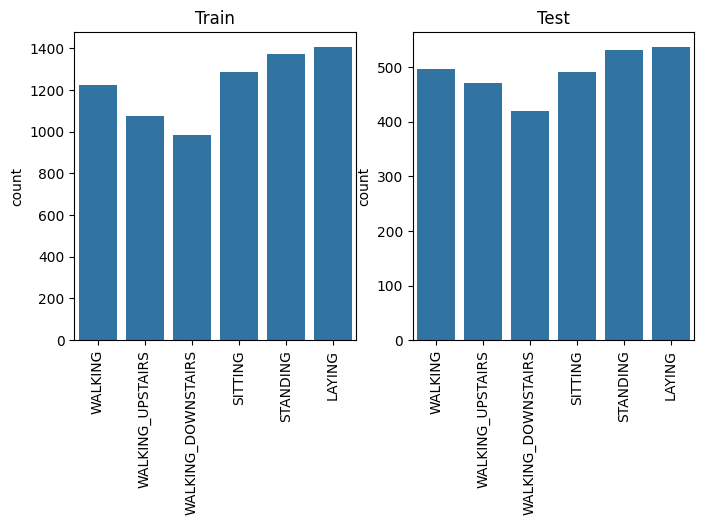

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2, figsize=(8,4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_xticks(range(len(labels_names)))
axs[0].set_xticklabels(labels_names.values(),rotation=90)
axs[0].set_title('Train')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_xticks(range(len(labels_names)))
axs[1].set_xticklabels(labels_names.values(),rotation=90)
axs[1].set_title('Test')
fig.show()